<a href="https://colab.research.google.com/github/crazydragonhacker/MLminiProjectSNU/blob/main/Copy_of_MLminiProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ------------------------------
# STEP 1: Import Libraries
# ------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
# ------------------------------
# STEP 2: Load Dataset from Google Drive
# ------------------------------

url = "https://drive.google.com/uc?id=12xR8YWPMu7qQM-W-8GuykANQdzUEvajP&export=download"
df = pd.read_csv(url)

print("✅ Data Loaded Successfully")
print(df.head())


✅ Data Loaded Successfully
            Timestamp     Age  \
0  8/27/2025 11:13:12  Age-21   
1  8/27/2025 13:19:21  Age-19   
2  8/27/2025 13:20:10  Age-20   
3  8/27/2025 13:21:56  Age-22   
4  8/27/2025 13:23:18  Age-21   

  Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)  \
0                                                120                                                                                          
1                                                167                                                                                          
2                                                167                                                                                          
3                                                170                                                                                          
4                                             167 cm       

In [ ]:
print(df.columns.tolist())


['Timestamp', 'Age', "Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)", 'Weight\nRange should be between 30 - 150 kg', 'Cuisine_top1', 'Cuisine_top2', 'Cuisine_top3', 'Spice Tolerance', 'Dietary Preference', 'Eating Out Per week', 'Food Budget per meal Note: Provide integer value for eg like-199', 'Sweet tooth level (1 is low and 5 is high)', 'Tea vs Coffee', 'Movie_genre_top1', '  Movie_genre_top2  ', '  Movie_genre_top3 ', '  Series_genre_top1  ', '  Series_genre_top2  ', '  Series_genre_top3  ', '  Content_lang_top1  ', '  Content_lang_top2  ', '  Content_lang_top3  ', 'Ott Top1', 'Ott Top2', 'Ott Top3', '  Binge frequency per week  ', '  Screen Time Movies or series in hours per week.\n', '  Gaming days per week  ', '  Gaming hours per week  \n(Provide Values in integer between 0-50)', '  Game Genre Top1', '  Game Genre Top2', '  Game Genre Top3  ', '  Gaming Platform Top1', '  Gaming Platform

In [ ]:
# ------------------------------
# STEP 3: Clean & Prepare Data
# ------------------------------
df = df.rename(columns={
    "Ott Top1": "ott",
    "Movie_genre_top1": "movie_genre",
    "  Series_genre_top1  ": "series_genre",
    "  Binge frequency per week  ": "binge_freq",
    "  Screen Time Movies or series in hours per week.\n": "screen_time"
})

# Drop rows with missing values
df = df.dropna()



👑 OTT King/Queen of SNU = Netflix


/tmp/ipython-input-2301128733.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ott', order=df['ott'].value_counts().index, palette="viridis")


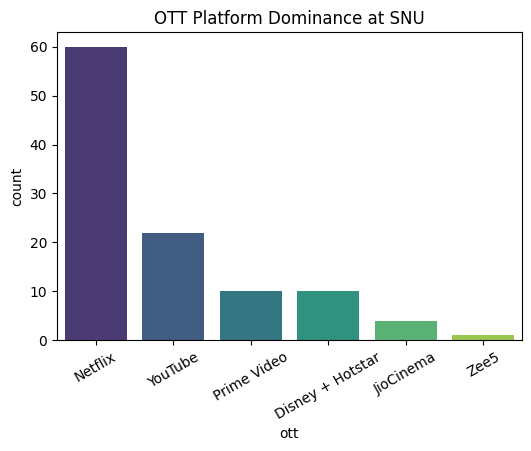

/tmp/ipython-input-2301128733.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ott', y='screen_time', palette="coolwarm")


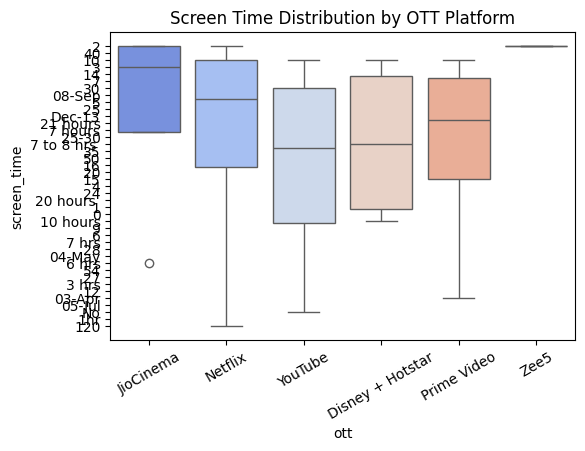

In [ ]:

# ------------------------------
# STEP 4: Descriptive Analytics
# ------------------------------
dominant_ott = df['ott'].value_counts().idxmax()
print(f"\n👑 OTT King/Queen of SNU = {dominant_ott}")

# Distribution of OTT platforms
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='ott', order=df['ott'].value_counts().index, palette="viridis")
plt.title("OTT Platform Dominance at SNU")
plt.xticks(rotation=30)
plt.show()

# Screen time per platform
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='ott', y='screen_time', palette="coolwarm")
plt.title("Screen Time Distribution by OTT Platform")
plt.xticks(rotation=30)
plt.show()


In [ ]:
print(df['binge_freq'].unique())
print(df['screen_time'].unique())


[4 2 3 1 6 5 7 0]
['2' '40' '10' '3' '14' '7' '30' '08-Sep' '5' '25' 'Dec-13' '21 hours'
 '7 hours' '25-30' '7 to 8 hrs ' '35' '50' '16' '20' '15' '4' '24'
 '20 hours ' '1' '0' '10 hours' '9' '6' '7 hrs' '28' '04-May' '6 hrs' '54'
 '27' '3 hrs' '12' '03-Apr' '05-Jul' 'No' '1hr' '120']


In [ ]:
# Force numeric, turn invalid strings into NaN
df['binge_freq'] = pd.to_numeric(df['binge_freq'], errors='coerce')
df['screen_time'] = pd.to_numeric(df['screen_time'], errors='coerce')

# Drop rows with invalid values (NaN)
df = df.dropna(subset=['binge_freq','screen_time'])


In [ ]:
# ------------------------------
# STEP 5: Encode Categorical Features
# ------------------------------
le = LabelEncoder()
df['ott'] = le.fit_transform(df['ott'])
df['movie_genre'] = le.fit_transform(df['movie_genre'])
df['series_genre'] = le.fit_transform(df['series_genre'])

# Scale numerical features
scaler = StandardScaler()
df[['binge_freq','screen_time']] = scaler.fit_transform(df[['binge_freq','screen_time']])


In [ ]:
# ------------------------------
# STEP 6: Train Predictive Model
# ------------------------------
X = df[['movie_genre','series_genre','binge_freq','screen_time']]
y = df['ott']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n📊 Model Evaluation Report:")
print(classification_report(y_test, y_pred))



📊 Model Evaluation Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         1
           2       0.50      0.88      0.64         8
           3       0.00      0.00      0.00         2
           4       0.50      0.20      0.29         5
           5       0.00      0.00      0.00         0

    accuracy                           0.53        19
   macro avg       0.50      0.40      0.40        19
weighted avg       0.55      0.53      0.47        19



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

/tmp/ipython-input-3470116628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance, x="Importance", y="Feature", palette="magma")


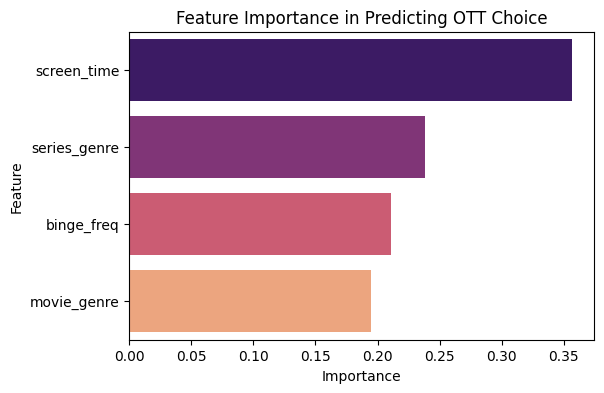

In [ ]:

# ------------------------------
# STEP 7: Feature Importance
# ------------------------------
importances = model.feature_importances_
feat_importance = pd.DataFrame({"Feature": X.columns, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(data=feat_importance, x="Importance", y="Feature", palette="magma")
plt.title("Feature Importance in Predicting OTT Choice")
plt.show()